In [15]:
import os
import cv2
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

In [16]:
folder_path = 'resource'
file_list = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

dropdown = widgets.Dropdown(
    options=[(f"{i}. {name}", name) for i, name in enumerate(file_list)],
    description='Gambar:'
)

display(dropdown)


Dropdown(description='Gambar:', options=(('0. WhatsApp Image 2025-05-02 at 2.38.25 PM.jpeg', 'WhatsApp Image 2…

In [17]:
selected_file = dropdown.value
image_path = os.path.join(folder_path, selected_file)
img = cv2.imread(image_path)
img_rgb = img[:, :, ::-1]

print(f"Tipe data gambar: {img.dtype}, ukuran: {img.shape}")
height, width, _ = img.shape


Tipe data gambar: uint8, ukuran: (612, 398, 3)


In [ ]:
print("\nKonversi ke Grayscale dimulai...")
grayscale = [[0 for _ in range(width)] for _ in range(height)]
KR, KG, KB = 0.299, 0.587, 0.114
for y in range(height):
    for x in range(width):
        b = img[y, x, 0] / 255.0
        g = img[y, x, 1] / 255.0
        r = img[y, x, 2] / 255.0
        gray = KR * r + KG * g + KB * b
        grayscale[y][x] = gray
print("Grayscale selesai.")



Konversi ke Grayscale dimulai...
Grayscale selesai.


In [ ]:
print("\nKonversi ke Biner dimulai...")
thresh = 0.5
binary = [[0 for _ in range(width)] for _ in range(height)]
for y in range(height):
    for x in range(width):
        if grayscale[y][x] >= thresh:
            binary[y][x] = 1
        else:
            binary[y][x] = 0
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> Gray: {grayscale[y][x]:.3f}, Binary: {binary[y][x]}')
print("Biner selesai.")


Konversi ke Biner dimulai...
Pixel[0,0] -> Gray: 1.000, Binary: 1
Pixel[0,100] -> Gray: 1.000, Binary: 1
Pixel[0,200] -> Gray: 1.000, Binary: 1
Pixel[0,300] -> Gray: 1.000, Binary: 1
Pixel[100,0] -> Gray: 1.000, Binary: 1
Pixel[100,100] -> Gray: 0.996, Binary: 1
Pixel[100,200] -> Gray: 0.227, Binary: 0
Pixel[100,300] -> Gray: 0.985, Binary: 1
Pixel[200,0] -> Gray: 1.000, Binary: 1
Pixel[200,100] -> Gray: 1.000, Binary: 1
Pixel[200,200] -> Gray: 0.733, Binary: 1
Pixel[200,300] -> Gray: 0.709, Binary: 1
Pixel[300,0] -> Gray: 1.000, Binary: 1
Pixel[300,100] -> Gray: 0.666, Binary: 1
Pixel[300,200] -> Gray: 1.000, Binary: 1
Pixel[300,300] -> Gray: 0.533, Binary: 1
Pixel[400,0] -> Gray: 1.000, Binary: 1
Pixel[400,100] -> Gray: 0.511, Binary: 1
Pixel[400,200] -> Gray: 0.494, Binary: 0
Pixel[400,300] -> Gray: 1.000, Binary: 1
Pixel[500,0] -> Gray: 1.000, Binary: 1
Pixel[500,100] -> Gray: 1.000, Binary: 1
Pixel[500,200] -> Gray: 1.000, Binary: 1
Pixel[500,300] -> Gray: 0.411, Binary: 0
Pixel[


Menampilkan hasil...


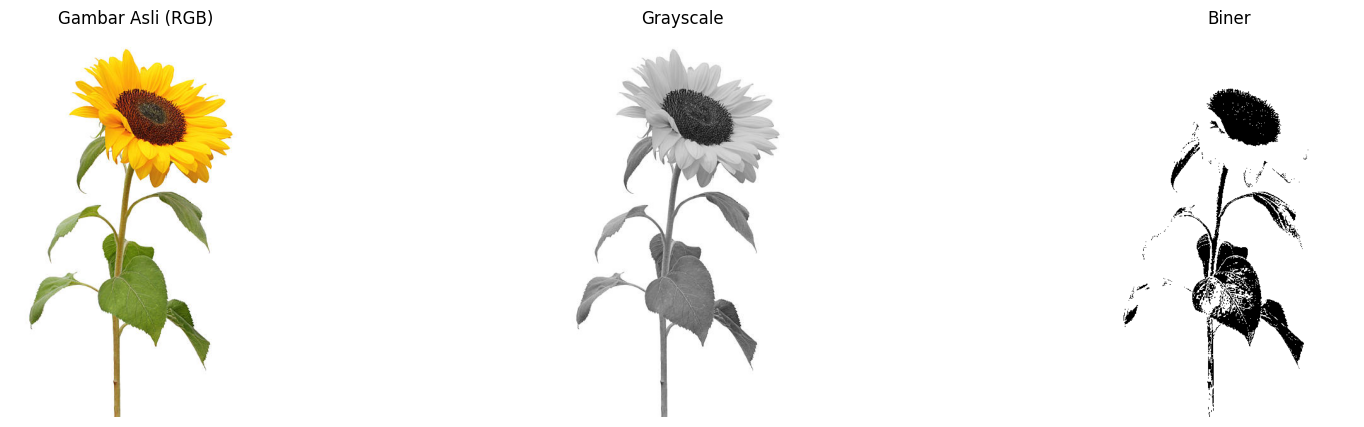

In [ ]:
print("\nMenampilkan hasil...")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Gambar Asli (RGB)')
axes[0].axis('off')

axes[1].imshow(grayscale, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(binary, cmap='gray')
axes[2].set_title('Biner')
axes[2].axis('off')


plt.show()
